In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('./students_adaptability_level_online_education.csv')

In [3]:
df_data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

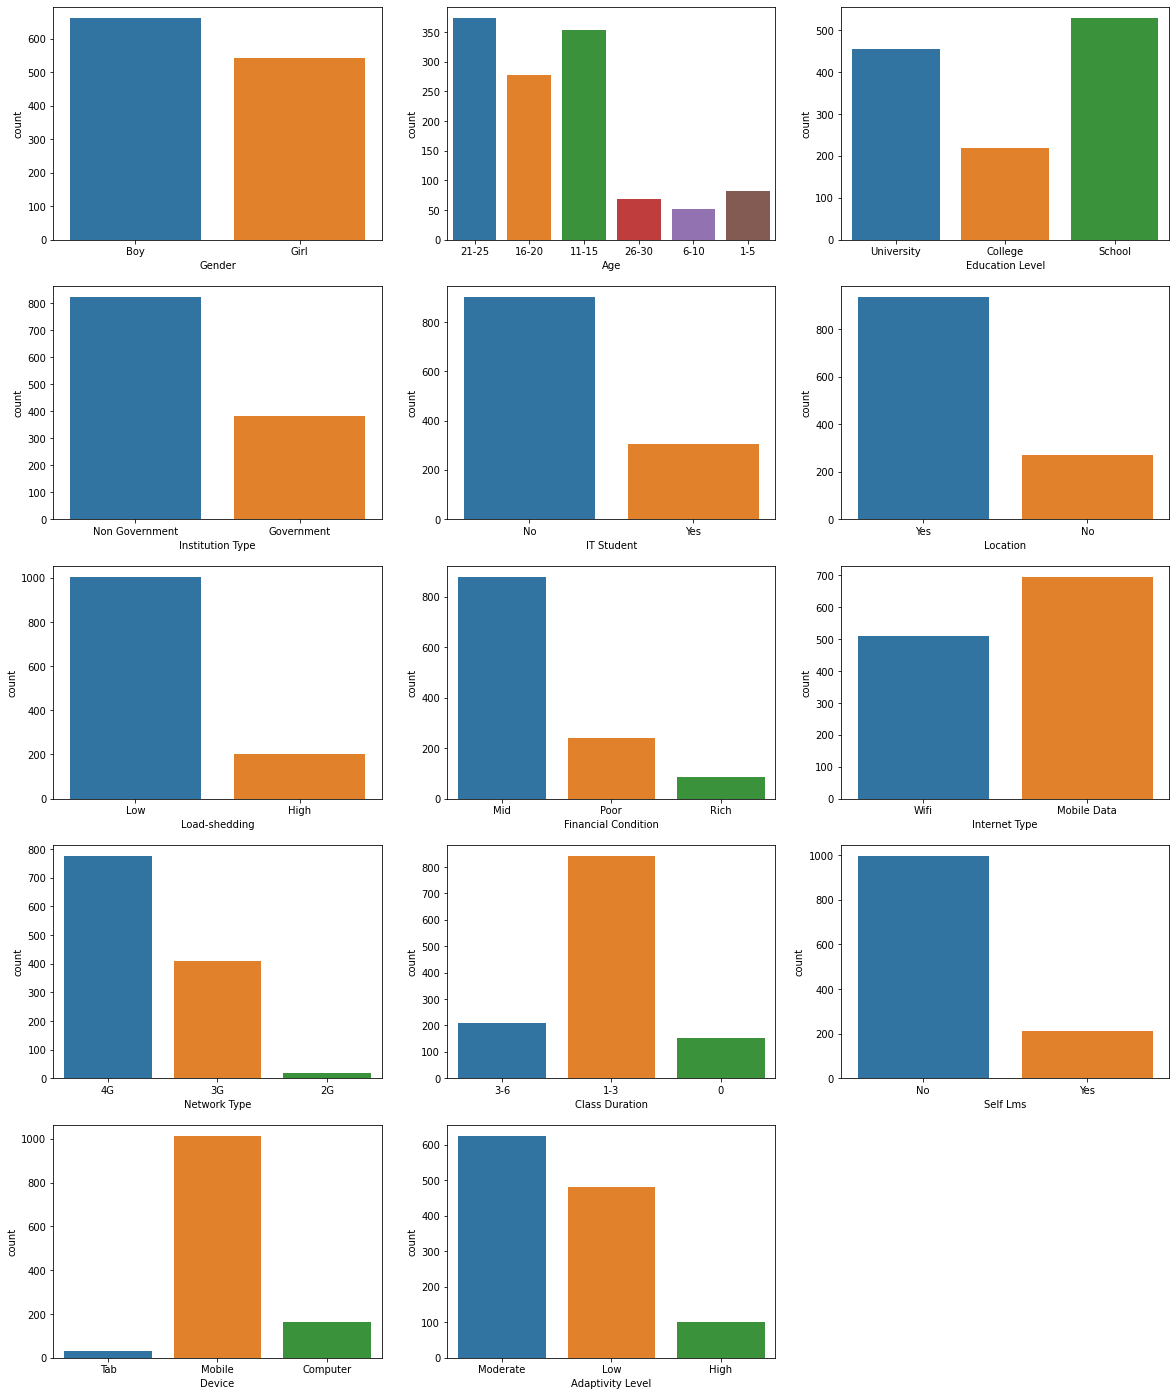

In [4]:
i = 1
plt.figure(figsize=(20,30))
for feature in df_data:
    plt.subplot(6,3,i)
    sns.countplot(x=feature, data=df_data)
    i += 1

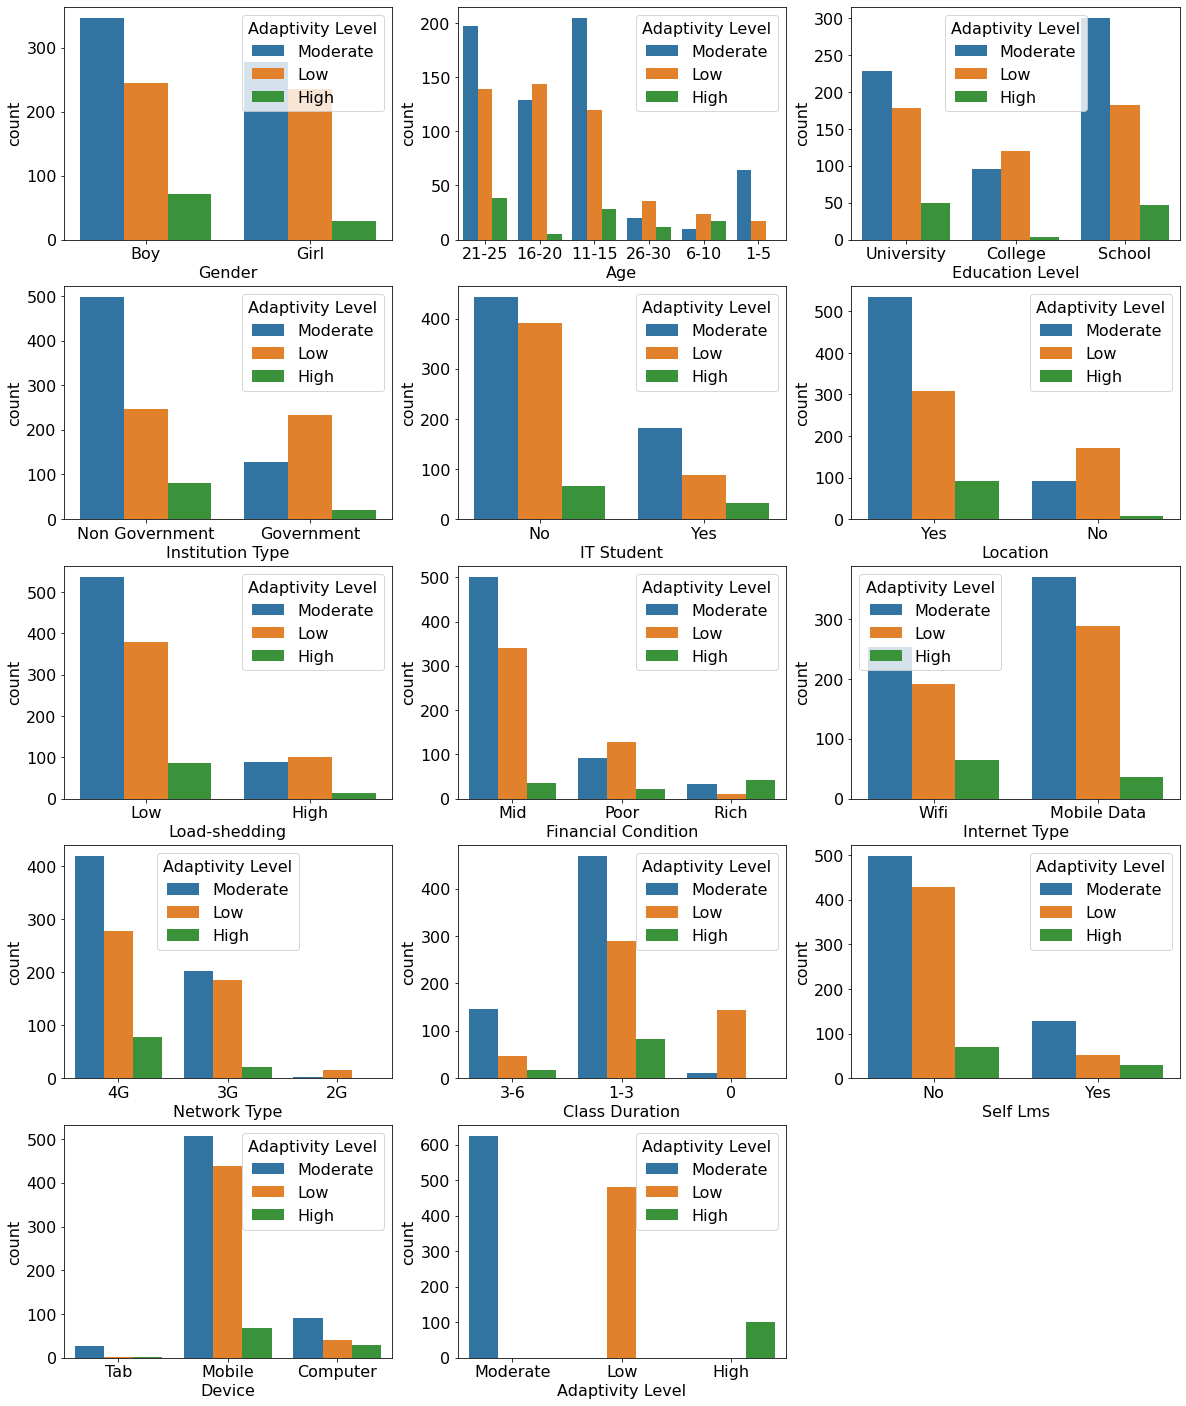

In [8]:
i = 1
plt.figure(figsize=(20,30))
plt.rcParams.update({'font.size': 16})
for feature in df_data:
    plt.subplot(6,3,i)
    sns.countplot(x=feature, hue='Adaptivity Level', data=df_data)
    i += 1
plt.savefig("Adaptivity Level in features")

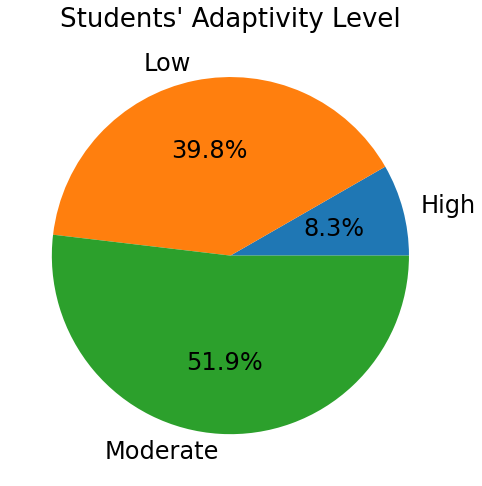

In [15]:
adapt_group = df_data.groupby('Adaptivity Level').size().reset_index().rename(columns={0: 'total'}).sort_values('total')

plt.figure(figsize=(8,15))

plt.pie(adapt_group["total"],
        labels = adapt_group["Adaptivity Level"],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 24},
        )                    

plt.title("Students' Adaptivity Level", {"fontsize" : 26})
plt.savefig("Students' ada lev")

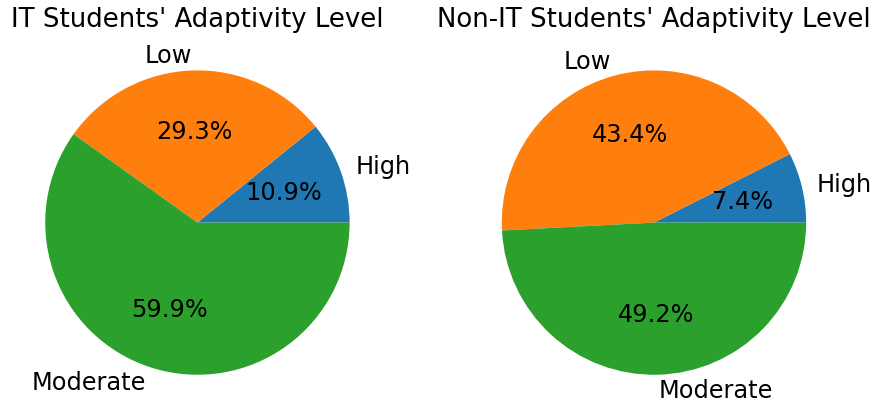

In [16]:
IT_adaptLel_group = df_data[df_data["IT Student"] == "Yes"].groupby('Adaptivity Level').size().reset_index().rename(columns={0: 'total'}).sort_values('total')

plt.figure(figsize=(15,25))

plt.subplot(1,2,1)
plt.pie(IT_adaptLel_group["total"],
        labels = IT_adaptLel_group["Adaptivity Level"],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 24},
        )                    

plt.title("IT Students' Adaptivity Level", {"fontsize" : 26})


NonIT_adaptLel_group = df_data[df_data["IT Student"] == "No"].groupby('Adaptivity Level').size().reset_index().rename(columns={0: 'total'}).sort_values('total')

plt.subplot(1,2,2)
plt.pie(NonIT_adaptLel_group["total"],
        labels = NonIT_adaptLel_group["Adaptivity Level"],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 24},
        )                    

plt.title("Non-IT Students' Adaptivity Level", {"fontsize" : 26})
plt.savefig("IT Student")

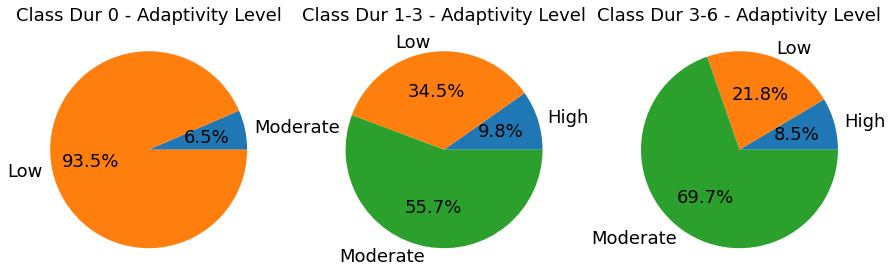

In [20]:
plt.figure(figsize=(15,25))


class_dur = ["0", "1-3", "3-6"]

for i in range(3):
    plt.subplot(1,3,i+1)
    LessonDur_adaptLel_group = df_data[df_data["Class Duration"] == class_dur[i]].groupby('Adaptivity Level').size().reset_index().rename(columns={0: 'total'}).sort_values('total')
    
    plt.pie(LessonDur_adaptLel_group["total"],
        labels = LessonDur_adaptLel_group["Adaptivity Level"],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 18},
        )                    

    plt.title("Class Dur {} - Adaptivity Level".format(class_dur[i]), {"fontsize" : 18})
plt.savefig("class dur")

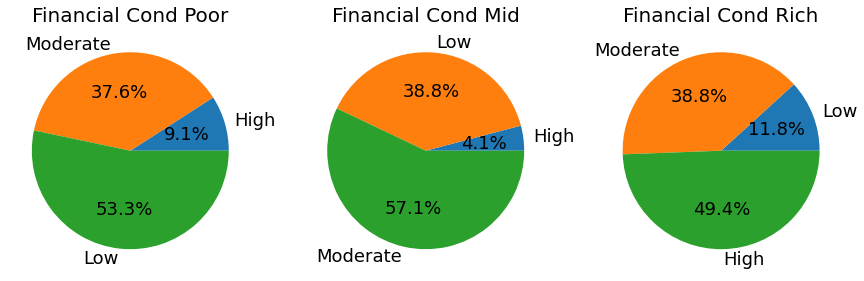

In [21]:
plt.figure(figsize=(15,25))


Financial_cond = ["Poor", "Mid", "Rich"]

for i in range(3):
    plt.subplot(1,3,i+1)
    LessonDur_adaptLel_group = df_data[df_data["Financial Condition"] == Financial_cond[i]].groupby('Adaptivity Level').size().reset_index().rename(columns={0: 'total'}).sort_values('total')
    
    plt.pie(LessonDur_adaptLel_group["total"],
        labels = LessonDur_adaptLel_group["Adaptivity Level"],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 18},
        )                    

    plt.title("Financial Cond {}".format(Financial_cond[i]), {"fontsize" : 20})
plt.savefig("Financial cond")

In [22]:
from sklearn.preprocessing import OrdinalEncoder
Ord_enc = OrdinalEncoder()
names = df_data.columns
tmp_data = Ord_enc.fit_transform(df_data)

df_data = pd.DataFrame(tmp_data, columns=names)
df_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler


In [30]:
over = SMOTE(random_state=50)
under = RandomUnderSampler(random_state=50)

F, T = over.fit_resample(df_data.drop(["Adaptivity Level"], axis=1), df_data["Adaptivity Level"])
features, target = under.fit_resample(F, T)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

In [31]:
model = SVC(C=10, kernel='poly')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       120
         1.0       0.89      0.93      0.91       128
         2.0       0.95      0.77      0.85       127

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



In [32]:
model = KNeighborsClassifier(n_neighbors=4, weights='distance')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       120
         1.0       0.93      0.90      0.92       128
         2.0       0.92      0.88      0.90       127

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



In [33]:
model = DecisionTreeClassifier(random_state=50)
para = {'max_depth': range(5,18,2),
    'min_samples_leaf': range(1,20,5),
    'min_samples_split': range(2,5),
    'criterion': ["gini", "entropy"],
    'splitter':['best', 'random'],
    'max_features': ['auto']
}
grid = GridSearchCV(estimator=model, param_grid=para, n_jobs=-1, verbose=2, scoring = "accuracy",error_score='raise')
grid.fit(X_train, y_train)
grid.best_estimator_

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


DecisionTreeClassifier(max_depth=17, max_features='auto', random_state=50)

In [34]:
best_model = grid.best_estimator_
pred = best_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       120
         1.0       0.94      0.94      0.94       128
         2.0       0.96      0.88      0.92       127

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375



In [35]:
random_grid = {'n_estimators': range(200,2000,180),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(10,110,10),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
model = RandomForestClassifier(random_state=50)

grid_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=50, n_jobs = -1)
grid_random.fit(X_train,y_train)
grid_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(max_depth=90, max_features='sqrt', n_estimators=1100,
                       random_state=50)

In [36]:
best_model = grid_random.best_estimator_
pred = best_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       120
         1.0       0.94      0.91      0.93       128
         2.0       0.93      0.89      0.91       127

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



In [37]:
model = AdaBoostClassifier(random_state=50)
para = {
    'n_estimators': range(1,20,2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8],
    'algorithm': ['SAMME', 'SAMME.R'],
}
grid = GridSearchCV(model, para, n_jobs = -1, verbose = 2)
grid.fit(X_train,y_train)
grid.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


AdaBoostClassifier(learning_rate=0.8, n_estimators=19, random_state=50)

In [38]:
best_model = grid.best_estimator_
pred = best_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       120
         1.0       0.71      0.60      0.65       128
         2.0       0.57      0.70      0.63       127

    accuracy                           0.68       375
   macro avg       0.69      0.68      0.68       375
weighted avg       0.69      0.68      0.68       375



In [39]:
model = XGBClassifier(random_state=50)
para = {'gamma': [0.4,0.8,1.6],
        'learning_rate': [0.1, 0.2, 0.6],
        'max_depth': [6,8,10,12],
        'n_estimators': [65,100,130],
        'reg_alpha': [0,0.2,0.4,0.8],
        'reg_lambda': [0.2,0.4,0.8]}
grid = GridSearchCV(estimator=model, param_grid=para, verbose=2,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_estimator_

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=65, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=50, reg_alpha=0, ...)

In [40]:
best_model = grid.best_estimator_
pred = best_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       120
         1.0       0.93      0.93      0.93       128
         2.0       0.94      0.86      0.90       127

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



In [41]:
model = grid.best_estimator_
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
7,Financial Condition,0.238959
10,Class Duration,0.111732
3,Institution Type,0.095407
9,Network Type,0.082180
11,Self Lms,0.075751
1,Age,0.070612
2,Education Level,0.067278
5,Location,0.049822
0,Gender,0.049705
8,Internet Type,0.048865
